### Importing libraries

In [1]:
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import time
import random

In [2]:
def RotationOfNeighbor2(x_f, y_f, phi_f, x_n, y_n, phi_n):
    
    ll_t = x_f.shape[0]
    
    x_f_T, y_f_T, phi_f_T = np.zeros(ll_t), np.zeros(ll_t), np.zeros(ll_t)
    x_n_T, y_n_T, phi_n_T = np.zeros(ll_t), np.zeros(ll_t), np.zeros(ll_t)
    

    for t in range(ll_t):
        rotationAngle   = - phi_f[t] + (np.pi/2)
        translation_x   = - x_f[t]
        translation_y   = - y_f[t]
        
        # Translation + rotation of focal individual.
        xAux = x_f[t] - x_f[t]
        yAux = y_f[t] - y_f[t]
        
        x_f_T[t]   = (xAux * np.cos(rotationAngle)) - (yAux * np.sin(rotationAngle))
        y_f_T[t]   = (xAux * np.sin(rotationAngle)) + (yAux * np.cos(rotationAngle))
        phi_f_T[t] = phi_f[t] + rotationAngle
        
        
        # Translation + rotation of neighbor.
        xAux = x_n[t] - x_f[t]
        yAux = y_n[t] - y_f[t]
        
        x_n_T[t]   = (xAux * np.cos(rotationAngle)) - (yAux * np.sin(rotationAngle))
        y_n_T[t]   = (xAux * np.sin(rotationAngle)) + (yAux * np.cos(rotationAngle))
        phi_n_T[t] = phi_n[t] + rotationAngle

    return x_f_T, y_f_T, phi_f_T, x_n_T, y_n_T, phi_n_T

In [3]:
def RotationOfNeighbor(x_f, y_f, phi_f, x_n, y_n, phi_n):
    
    rotationAngle   = - phi_f + (np.pi/2)
    translation_x   = - x_f
    translation_y   = - y_f
        
    # Translation + rotation of focal individual.
    xAux = x_f - x_f
    yAux = y_f - y_f
        
    x_f_T   = (xAux * np.cos(rotationAngle)) - (yAux * np.sin(rotationAngle))
    y_f_T   = (xAux * np.sin(rotationAngle)) + (yAux * np.cos(rotationAngle))
    phi_f_T = phi_f + rotationAngle
        
        
    # Translation + rotation of neighbor.
    xAux = x_n - x_f
    yAux = y_n - y_f
        
    x_n_T   = (xAux * np.cos(rotationAngle)) - (yAux * np.sin(rotationAngle))
    y_n_T   = (xAux * np.sin(rotationAngle)) + (yAux * np.cos(rotationAngle))
    phi_n_T = phi_n + rotationAngle

    return x_f_T, y_f_T, phi_f_T, x_n_T, y_n_T, phi_n_T

### Rotation

<ipython-input-6-5737b0cf1462>:57: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.subplots_adjust(wspace=0.4)


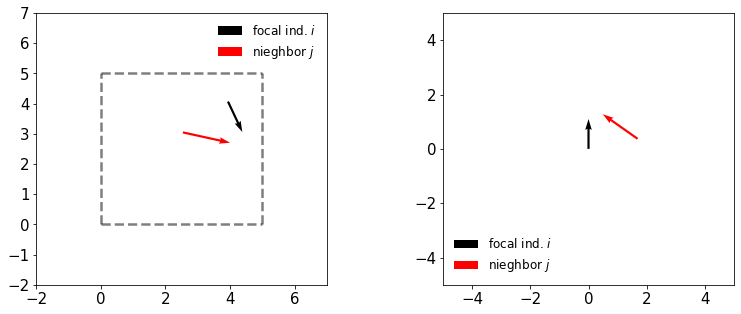

In [6]:
# Size of box
Lx, Ly = 5, 5

# Walls of box
w1_x, w1_y = np.full(6, 0),  np.arange(0, Ly+1, 1)
w2_x, w2_y = np.full(6, Ly), np.arange(0, Ly+1, 1)
w3_x, w3_y = np.arange(0, Ly+1, 1), np.full(6, 0)
w4_x, w4_y = np.arange(0, Ly+1, 1), np.full(6, Lx)


# Focal particle (fish)
x_i, y_i   = np.random.rand() * Lx, np.random.rand() * Ly
phi_i      = np.random.rand() * 2 * np.pi
v_i        = 1.1

# Neighbor particle (robot)
x_j, y_j   = np.random.rand() * Lx, np.random.rand() * Ly
phi_j      = np.random.rand() * 2 * np.pi
v_j        = 1.5

# Implementation of rotation
x_i_T, y_i_T, phi_i_T, x_j_T,  y_j_T,  phi_j_T  = RotationOfNeighbor(x_i, y_i, phi_i, x_j,  y_j,  phi_j)



# Plot
plt.rcParams['figure.figsize'] = [12.5, 5]
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
FS, MS, LFS, TFS, LW = 12, 3, 12, 12, 1.2
    
fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
ax = axs[0]
ax.plot(w1_x, w1_y, '--', linewidth=2.5, color='black', alpha=0.5)
ax.plot(w2_x, w2_y, '--', linewidth=2.5, color='black', alpha=0.5)
ax.plot(w3_x, w3_y, '--', linewidth=2.5, color='black', alpha=0.5)
ax.plot(w4_x, w4_y, '--', linewidth=2.5, color='black', alpha=0.5)
ax.quiver(x_i, y_i, v_i * np.cos(phi_i), v_i * np.sin(phi_i), color='black', 
          angles='xy', scale_units='xy', scale=1, label='focal ind. $i$')
ax.quiver(x_j, y_j, v_j * np.cos(phi_j), v_j * np.sin(phi_j), color='red', 
          angles='xy', scale_units='xy', scale=1, label='nieghbor $j$')
ax.set_xlim([-2, Lx+2])
ax.set_ylim([-2, Ly+2])
ax.legend(frameon=False, loc='best', fontsize=12)

ax = axs[1]
ax.quiver(x_i_T, y_i_T, v_i * np.cos(phi_i_T), v_i * np.sin(phi_i_T), color='black', 
          angles='xy', scale_units='xy', scale=1, label='focal ind. $i$')
ax.quiver(x_j_T, y_j_T, v_j * np.cos(phi_j_T), v_j * np.sin(phi_j_T), color='red', 
          angles='xy', scale_units='xy', scale=1, label='nieghbor $j$')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.legend(frameon=False, loc='lower left', fontsize=12)


# set the spacing between subplots
plt.subplots_adjust(wspace=0.4)
plt.show()

In [87]:
a1 = []
for i in range(5):
    a1.append(i)
a1 = np.array(a1)
    
a2 = []
for i in range(10,12):
    a2.append(i)
a2 = np.array(a2)
    
a3 = np.append(a1,a2)
a3 = np.append(a3, a1)
a3 = np.append(a3, a2)


print(a1)
print(a2)
print(a3)

[0 1 2 3 4]
[10 11]
[ 0  1  2  3  4 10 11  0  1  2  3  4 10 11]


In [ ]:
import pandas as pd
import seaborn as sns

In [11]:
# intialise data of lists.
tips = {'Trial1':['Tom', 'nick', 'krish', 'jack'],
        'Age':[20, 21, 19, np.NaN]}
 
# Create DataFrame
df = pd.DataFrame(tips)
 
# Print the output.
print(df)

  Trial1   Age
0    Tom  20.0
1   nick  21.0
2  krish  19.0
3   jack   NaN


In [52]:
aa = pd.DataFrame({'a':[0,1,1,2,3,4,52]})
bb = pd.DataFrame({'b':[3,4,5]})
cc = pd.DataFrame({'c':[6,7,8]})

#tips2 = pd.DataFrame({'Trials':['a', 'b', 'c']})
tips2 = pd.DataFrame({'Trials':[aa, bb, cc]})
print(tips2)

pd.DataFrame.keys(tips2)
print(len(tips2))

                                            Trials
0      a
0   0
1   1
2   1
3   2
4   3
5   4
6  52
1                                 b
0  3
1  4
2  5
2                                 c
0  6
1  7
2  8
3


In [81]:
a = [-7,-6,-5,-4,-4,-4,-5,-5,-9,-10,-20]
b = [0,1,2,3,4,5,6,7,8,9]
c = [15, 17]

la, lb, lc = len(a), len(b), len(c)
# now find the max
max_len = max(la, lb, lc)

if not max_len == la:
    a.extend([np.NaN]*(max_len-la))
if not max_len == lb:
    b.extend([np.NaN]*(max_len-lb))
if not max_len == lc:
    c.extend([np.NaN]*(max_len-lc))
    #c.extend(['']*(max_len-lc))

tips = pd.DataFrame({'trial 1':a,'trial 2':b,'trial 3':c})
print(tips)
#tips.keys
tips.values

    trial 1  trial 2  trial 3
0        -7      0.0     15.0
1        -6      1.0     17.0
2        -5      2.0      NaN
3        -4      3.0      NaN
4        -4      4.0      NaN
5        -4      5.0      NaN
6        -5      6.0      NaN
7        -5      7.0      NaN
8        -9      8.0      NaN
9       -10      9.0      NaN
10      -20      NaN      NaN


array([[ -7.,   0.,  15.],
       [ -6.,   1.,  17.],
       [ -5.,   2.,  nan],
       [ -4.,   3.,  nan],
       [ -4.,   4.,  nan],
       [ -4.,   5.,  nan],
       [ -5.,   6.,  nan],
       [ -5.,   7.,  nan],
       [ -9.,   8.,  nan],
       [-10.,   9.,  nan],
       [-20.,  nan,  nan]])

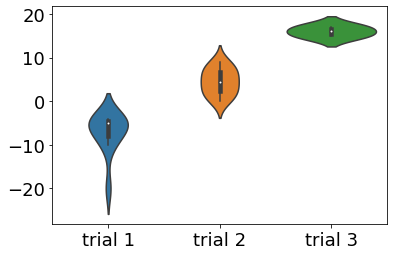

In [82]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
FS, MS, LFS, TFS, LW = 12, 3, 12, 16, 1.2

ax = sns.violinplot(data=tips)

In [11]:
test = np.zeros(5)

test[2] = np.NaN
test[4] = np.NaN

print(test)

for t in range(5):
    x = np.isnan(test[t])
    if (x == True):
        print('There is a Nan in array!')

[ 0.  0. nan  0. nan]
There is a Nan in array!
There is a Nan in array!


In [17]:
np.random.seed(0)
test = np.random.rand(4)
print(test)

np.random.seed(1)
test = np.random.rand(4)
print(test)

np.random.seed(0)
test = np.random.rand(5)
print(test)

[0.5488135  0.71518937 0.60276338 0.54488318]
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]


In [27]:
test = np.linspace(0, 166, num=167, endpoint=True, dtype=int)
print(test)

test = np.linspace(167, 333, num=167, endpoint=True, dtype=int)
print(test)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166]
[167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184
 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202
 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238
 239 240 241 242 243 244 245 

In [30]:
angle_noise = np.random.rand(1)
print(angle_noise[0])

0.8917730007820798


In [31]:
for t in range(1,5):
    print(t)

1
2
3
4


In [2]:
ll   = 9
test = np.zeros((ll, 4))

counter  = 1
counter2 = 1
for t in range(ll):
    test[t, 0] = counter
    test[t, 1] = counter2
    counter2 += 1
    test[t, 2] = counter2
    counter2 += 1
    test[t, 3] = counter2
    counter2 += 1
    
    counter += 1
    if (counter > 3):
        counter = 1
        
test[3,3] = np.NaN

print(test)

[[ 1.  1.  2.  3.]
 [ 2.  4.  5.  6.]
 [ 3.  7.  8.  9.]
 [ 1. 10. 11. nan]
 [ 2. 13. 14. 15.]
 [ 3. 16. 17. 18.]
 [ 1. 19. 20. 21.]
 [ 2. 22. 23. 24.]
 [ 3. 25. 26. 27.]]


In [3]:
sel_test = test[test[:,0] == 1]
print(sel_test)

[[ 1.  1.  2.  3.]
 [ 1. 10. 11. nan]
 [ 1. 19. 20. 21.]]


In [5]:
for i in range(1,10,3):
    print(i)

1
4
7
